# Практическое задание № 4

Этапы выполнения: 

- **Шаг 1.** Импортировать библиотеки, загрузить содержимое файла, переименовать признаки:

https://raw.githubusercontent.com/OlesiaAngel/DataAnalitics/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/visualization/anketa_pr4.csv
- **Шаг 2.** Выполнить токенизацию (используйте признаки про фильмы, ожидание от курса, виды спорта)
- **Шаг 3.** Выполнить лемматизацию и удалить стоп-слова и знаки препинания (для признаков из шага 2)
- **Шаг 4.** Выполнить подсчёт количества вхождений слов (для признаков из шага 2)
- **Шаг 5.** Построить гистограмму по популярным видам спорта (20 видов), treepmap по фильмам (20 слов), облако слов из топ 50 слов по признаку ожидание от курса.  
- **Шаг 6.** Опубликовать файл расширения ipynb на платформу Odin.

In [ ]:
#Импортировать библиотеки, загрузить содержимое файла, переименовать признаки

In [1]:
import re
import string
import nltk # библиотека nltk
from nltk.tokenize import word_tokenize # готовые токенизаторы библиотеки nltk
from nltk.corpus import stopwords

import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(13, 10))

import pandas as pd
import numpy as np
from PIL import Image
import datetime as dt 

import plotly.express as px
import plotly.graph_objects as go
from plotly import subplots

from pymorphy2 import MorphAnalyzer

from collections import Counter
from wordcloud import WordCloud

import warnings
warnings.simplefilter("ignore")

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/OlesiaAngel/DataAnalitics/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/visualization/anketa_pr4.csv', 
                sep=';')

In [3]:
df.head()

,id,Отметка времени,Какая у Вас операционная система на ПК?,С какими языками программирования знакомы?,Какой Ваш любимый вид спорта?,Посоветуйте хорошие фильмы,Что Вы ожидаете от курса?,Из какого Вы города?
0,1,7.27.2022 18:20:10,Win,с программированием не знакома,бег с препятствиями по жизни,"""Гордость и предубеждение"", ""Лунные влюблённы...",Научиться интересной профессии с возможностью ...,Севастополь
1,2,7.28.2022 23:23:42,Win,Delphi,Биатлон,Английский пациент. Облачный атлас. Призрачная...,Удовольствие от получения новых знаний,Москва
2,3,7.27.2022 17:13:20,Win,"Python, Pascal / VB / Кумир / алгоритмический ...",шахматы,"""Начало"" Нолана, ""Меланхолия"" Л. фон Триера, ""...","Ожидаю, что выучусь на аналитика данных и полу...",Георгиевск
3,4,7.27.2022 17:16:58,MacOS,Pascal / VB / Кумир / алгоритмический язык,биатлон,1+1,новых знаний,Санкт-Петербург
4,5,7.30.2022 1:46:14,MacOS,Python,бадминтон,5 элемент,знаний,Ростов-на-Дону


In [4]:
df.info()#нулевых значений нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   id                                           130 non-null    int64 
 1   Отметка времени                              130 non-null    object
 2   Какая у Вас операционная система на ПК?      130 non-null    object
 3   С какими языками программирования знакомы?   130 non-null    object
 4   Какой Ваш любимый вид спорта?                130 non-null    object
 5   Посоветуйте хорошие фильмы                   130 non-null    object
 6   Что Вы ожидаете от курса?                    130 non-null    object
 7   Из какого Вы города?                         130 non-null    object
dtypes: int64(1), object(7)
memory usage: 8.2+ KB


In [5]:
#создаю словарь новых имен признаков
dict_new =dict(zip(df.columns,['id','timestamp','oc','programming_language','favorite_sport','good_film','expectation_of_course','city']))

In [6]:
df.rename(columns = dict_new, inplace = True)
df

,id,timestamp,oc,programming_language,favorite_sport,good_film,expectation_of_course,city
0,1,7.27.2022 18:20:10,Win,с программированием не знакома,бег с препятствиями по жизни,"""Гордость и предубеждение"", ""Лунные влюблённы...",Научиться интересной профессии с возможностью ...,Севастополь
1,2,7.28.2022 23:23:42,Win,Delphi,Биатлон,Английский пациент. Облачный атлас. Призрачная...,Удовольствие от получения новых знаний,Москва
2,3,7.27.2022 17:13:20,Win,"Python, Pascal / VB / Кумир / алгоритмический ...",шахматы,"""Начало"" Нолана, ""Меланхолия"" Л. фон Триера, ""...","Ожидаю, что выучусь на аналитика данных и полу...",Георгиевск
3,4,7.27.2022 17:16:58,MacOS,Pascal / VB / Кумир / алгоритмический язык,биатлон,1+1,новых знаний,Санкт-Петербург
4,5,7.30.2022 1:46:14,MacOS,Python,бадминтон,5 элемент,знаний,Ростов-на-Дону
...,...,...,...,...,...,...,...,...
125,126,8.13.2022 2:02:14,Win,Я не знаю ни одного языка программирования,"Тренажеры, кардио - занимаюсь регулярно",Up in the Air,"Ознакомление с навыками анализа данных, примен...",Санкт-Петербург
126,127,8.13.2022 16:42:28,Win,Я не знаю ни одного языка программирования,Легкая атлетика,Затерянный город,"Получение знаний, трудоустройство",Татарск
127,128,8.14.2022 4:09:55,Win,"Я не знаю ни одного языка программирования, из...",Волейбол,"""Сноуден"" 2016 г., ""Влюблённый богач"" 2020 г.,...",Хочу научиться работать с большим объемом данн...,Анапа
128,129,8.15.2022 11:36:19,Win,"C / C++ / C#, Java",Теннис,Форд против Феррари,Практических навыков и знаний,Ульяновск


In [ ]:
#Выполнить токенизацию (используйте признаки про фильмы, ожидание от курса, виды спорта)
#Выполнить лемматизацию и удалить стоп-слова и знаки препинания (для признаков из шага 2)

In [7]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Елена\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Елена\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
#df.good_film.unique()

In [26]:
#df.expectation_of_course.unique()

In [18]:
df.favorite_sport.unique()

AttributeError: 'DataFrame' object has no attribute 'favorite_sport'

In [19]:
words_film = np.concatenate(df['good_film'].apply(lambda s: s.lower().strip().split()).values)#перевод в строку столбца good_film
words_expectation = np.concatenate(df['expectation_of_course'].apply(lambda s: s.lower().strip().split()).values)#перевод в строку столбца expectation_of_course
words_sport = np.concatenate(df['favorite_sport'].apply(lambda s: s.lower().strip().split()).values)#перевод в строку столбца favorite_sport
words_sport

KeyError: 'good_film'

In [10]:
#создала функцию для лемматизации данных, разделила списки стоп-слов для каждого признака
def token_func(list_words, f):
    morf = MorphAnalyzer()#метод морфологического анализа
    nltk_punct = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ' #пунктуация
    nltk_stopwords = stopwords.words('russian')#стоп-слова
    new_tokens = []
    ss = '1+1'
    
    #мой список стоп-слов
    if f == 'words_film':
        my_stop_words = ['сериал','кор','л','это','г','др','тд','вз','лху','михалкоы'
                     ,'мнооооогий','москатить','назначенияасмирнов','нофегод','пуарый','тп','уве','унабомбер']
        new_tokens.append(ss)
    if f == 'words_expectation':
        my_stop_words = ['вс','дабы','который','лгкий','наш','никак','нравиться','получаться','поэтому','приложить','принимать','пролетать','просто','пространство','профессиюработа',
                    'родиться','сайтыработать','смочь','сразу','также','улучшениеувеличение','хочеться','чтоть','1+1']
    if f == 'words_sport': 
        my_stop_words = ['быстрый','вести','вид','выделять','жизнь','лгкай','нету', 'озрный','посвоему','смотреть','-']
        
    for token in list_words:
        token = re.sub(r'[^а-я ё]','',str(token))
        lemma_words = morf.parse(token)#лемматизация
        token = lemma_words[0].normal_form
        if (token not in nltk_stopwords) & (token not in my_stop_words) & (token not in nltk_punct):
            new_tokens.append(token)
        
    return new_tokens


In [128]:
c = 'ЙЦЁёWDDRRRSsllддrrддsws12345'

#test = re.sub(r'[^а-я ё w-z W-Z Ф-Я Ё /s /S]','',str(a))
test3 = re.sub(r' ^[W-ZА-ЯЁ][^а-яёw-z/s]\D','',str(c))
test4 = re.sub(r'[W-ZА-ЯЁ]*?[^a-zа-яё]','',str(c))
#test
test4

'ёsllддrrддsws'

In [122]:
c = 'ЙЦЁёWDDRRRSsllддrrддsws12345'
test5 = re.sub(r'\(.*?\)','',str(c))
test5

'ЙЦЁёWDDRRRSsllддrrддsws12345'

In [130]:
c = 'ЙЦЁёWDDRRRSsllддrrддsws12345'
tr=re.sub(r'^(?:[а-я]+[А-Я][а-я]*|[а-я]*[А-Я][а-я]+)$','',str(c))
tr

'ЙЦЁёWDDRRRSsllддrrддsws12345'

In [131]:
b ='ЙЦУУЁёWSsswыыыs112222345' 
test2 = re.sub(r' ^([а-яё]*[А-ЯЁ][а-яё]*)$','',str(b))
test2

'ЙЦУУЁёWSsswыыыs112222345'

In [11]:
film = token_func(words_film,'words_film')#токенизация по фильму
film.sort()
#заменила написание слова
z = []
for i, x in enumerate(film):
    if x == 'зелный':
        z.append(i)
for i in z:
    film[i] = 'зелёный'
#film

In [21]:
words_expectation = token_func(words_expectation,'words_expectation')#токенизация по ожиданию от курса
words_expectation.sort()
words_expectation

['автоматизировать',
 'академический',
 'анализ',
 'анализ',
 'анализ',
 'анализ',
 'анализ',
 'анализ',
 'анализировать',
 'анализировать',
 'анализировать',
 'аналитик',
 'аналитик',
 'аналитик',
 'аналитик',
 'аналитик',
 'аналитик',
 'аналитик',
 'аналитик',
 'аналитик',
 'аналитик',
 'аналитика',
 'аналитика',
 'аналитика',
 'аналитика',
 'аналитика',
 'аналитикипрограммирование',
 'аргументированно',
 'база',
 'база',
 'базовый',
 'базовый',
 'бд',
 'бизнеспланирование',
 'блок',
 'больший',
 'больший',
 'больший',
 'важно',
 'верный',
 'весь',
 'вид',
 'возможно',
 'возможность',
 'возможность',
 'возможность',
 'возможность',
 'возможность',
 'возможность',
 'возможность',
 'возможность',
 'возможность',
 'возможность',
 'возможность',
 'возможность',
 'возможность',
 'возможный',
 'востребовать',
 'востребовать',
 'востребовать',
 'востребовать',
 'всё',
 'всё',
 'вуз',
 'высокий',
 'высокооплачиваемый',
 'высокооплачиваемый',
 'вытекать',
 'выучиться',
 'гипотеза',
 'глубокий

In [20]:
words_sport = token_func(words_sport,'words_sport')#токенизация по видам спорта
words_sport.sort()
words_sport

['айкидо',
 'айкидо',
 'активно',
 'атлетика',
 'атлетика',
 'атлетика',
 'бадминтон',
 'байдарка',
 'балет',
 'баскетбол',
 'баскетбол',
 'баскетбол',
 'баскетбол',
 'бег',
 'бег',
 'бег',
 'бег',
 'бег',
 'бег',
 'бег',
 'бег',
 'беговой',
 'беговой',
 'биатлон',
 'биатлон',
 'биатлон',
 'бокс',
 'бокс',
 'большой',
 'большой',
 'борьба',
 'борьба',
 'борьба',
 'борьба',
 'борьба',
 'вейксноубординг',
 'велосипед',
 'велосипед',
 'велосипед',
 'велосипед',
 'велосипед',
 'велоспорт',
 'велоспорт',
 'волейбол',
 'волейбол',
 'волейбол',
 'волейбол',
 'волейбол',
 'волейбол',
 'волейбол',
 'волейбол',
 'волейбол',
 'волейбол',
 'волейбол',
 'воллейбол',
 'вольный',
 'гимнастика',
 'гимнастика',
 'гимнастика',
 'горный',
 'горный',
 'дзюдо',
 'единоборство',
 'зал',
 'заниматься',
 'заниматься',
 'заниматься',
 'заниматься',
 'затрудняться',
 'игра',
 'интересный',
 'интересный',
 'интересоваться',
 'йог',
 'йог',
 'йог',
 'йог',
 'йог',
 'йог',
 'каждый',
 'кардио',
 'катание',
 'катан

In [ ]:
#Выполнить подсчёт количества вхождений слов (для признаков из шага 2)

In [23]:
count_film = Counter()
count_film.update(film)
wc_top20 = count_film.most_common(20)
dfilm = pd.DataFrame(wc_top20, columns = ['film', 'count'])
dfilm


,film,count
0,зелёный,12
1,миля,10
2,начало,10
3,интерстеллара,7
4,игра,5
5,фильм,5
6,человек,5
7,всё,4
8,остров,4
9,проклятый,4


In [28]:
count_expectation = Counter()
count_expectation.update(words_expectation)
exp_top50 = count_expectation.most_common(50)
dexp = pd.DataFrame(exp_top50,columns = ['expectation','count'])
#exp_top50                                       

In [22]:
count_sport = Counter()
count_sport.update(words_sport)
sport_top20 = count_sport.most_common(20)
dsport = pd.DataFrame(sport_top20,columns = ['sport','count'])
sport_top20

[('плавание', 17),
 ('волейбол', 11),
 ('футбол', 10),
 ('ходьба', 9),
 ('бег', 8),
 ('теннис', 8),
 ('лыжа', 7),
 ('йог', 6),
 ('борьба', 5),
 ('велосипед', 5),
 ('спорт', 5),
 ('баскетбол', 4),
 ('заниматься', 4),
 ('катание', 4),
 ('настольный', 4),
 ('сноуборд', 4),
 ('фигурный', 4),
 ('шахматы', 4),
 ('атлетика', 3),
 ('биатлон', 3)]

In [ ]:
#Построить гистограмму по популярным видам спорта (20 видов), treepmap по фильмам (20 слов), 
#облако слов из топ 50 слов по признаку ожидание от курса.

In [35]:
#гистограмма по популярным видам спорта
fig = px.bar(dsport, x='sport', y='count', color='count', text_auto=True)
fig.show();

In [36]:
#treepmap по фильмам
fig = px.treemap(dfilm, path=['film'], values='count', color='film')
fig.show()

In [37]:
word_cloud_expectation = ' '.join(map(str,token_func(words_expectation,'words_expectation')))# по ожиданию


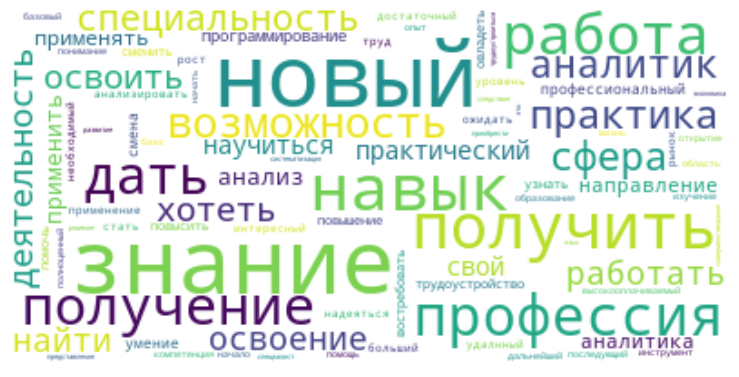

In [38]:
wordcloud = WordCloud(background_color = 'white', # цвет фона
                               max_words = 500, # максимальное количество слов
                               max_font_size = 50, # отображать максимальное значение шрифта
                               random_state = 1, # возвращает цвет PIL для каждого слова
                               margin=5,
                               collocations = False).generate(word_cloud_expectation)#collocations убрала повтор слов из облака
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");